## Approved Building Permits Data

In [ ]:
# First time run:
#!git lfs install
#!git lfs pull  

import pandas as pd
import matplotlib as plt

# Load the CSV file into a DataFrame
chunk_size = 100000
data_chunk_1 = pd.read_csv("../data/permits_1_data.csv", chunksize= chunk_size)

for chunk in data_chunk_1:
    # Perform EDA on the chunk here
    print(chunk.head()) 

data_chunk_2 = pd.read_csv("../data/permits_2_data.csv", chunksize= chunk_size)

for chunk in data_chunk_2:
    # Perform EDA on the chunk here
    print(chunk.head()) 

data_chunk_3 = pd.read_csv("../data/permits_3_data.csv", chunksize= chunk_size)

for chunk in data_chunk_3:
    # Perform EDA on the chunk here
    print(chunk.head()) 

In [ ]:
# Convert each CSV file to a Dataframe.
data_chunk_1 = pd.read_csv("../data/permits_1_data.csv")
data_chunk_2 = pd.read_csv("../data/permits_2_data.csv")
data_chunk_3 = pd.read_csv("../data/permits_3_data.csv")

# Concatenate into one Dataframe
permits = pd.concat([data_chunk_1, data_chunk_2, data_chunk_3], ignore_index=True)

# Print all column labels
print(permits.columns.values)

In [22]:
def dollar_to_float(column):
    column = column.astype(str)
    column = column.apply(lambda x: x.replace('$', ''))
    column = column.apply(lambda x: x.replace(',', ''))
    column = column.astype(float)
    return column

# Converting declared valuation column into floats
permits['declared_valuation'] = dollar_to_float(permits['declared_valuation'])
permits['total_fees'] = dollar_to_float(permits['total_fees'])

print(permits.dtypes)

object_id               int64
permitnumber           object
worktype               object
permittypedescr        object
description            object
comments               object
applicant              object
declared_valuation    float64
total_fees            float64
issued_date            object
expiration_date        object
status                 object
owner                  object
occupancytype          object
sq_feet               float64
address                object
city                   object
state                  object
zip                    object
property_id           float64
parcel_id             float64
gpsy                  float64
gpsx                  float64
geom_2249              object
lat                   float64
long                  float64
geom_4326              object
dtype: object


<Axes: xlabel='sq_feet', ylabel='declared_valuation'>

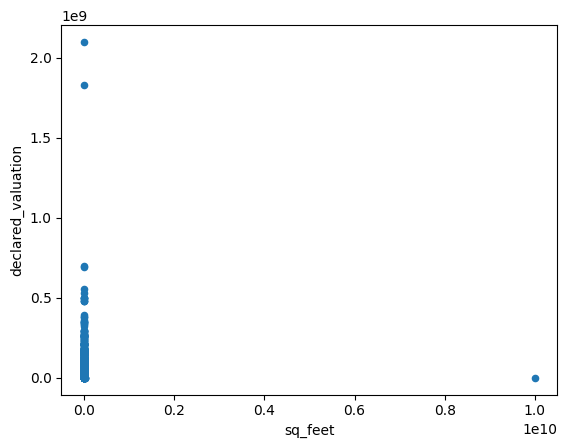

In [19]:
# Scatter plot of square feet vs. declared valuation
permits.plot.scatter(x = 'sq_feet', y = 'declared_valuation')